In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

# cscc

In [57]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/cSCC/cscc.h5ad")
adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 47068 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient', 'tum.norm', 'level1_celltype', 'level2_celltype', 'level3_celltype', 'cell.type', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'

In [58]:
adata = adata[adata.obs['tum.norm']=='Normal']
adata


View of AnnData object with n_obs × n_vars = 21562 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient', 'tum.norm', 'level1_celltype', 'level2_celltype', 'level3_celltype', 'cell.type', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'

In [59]:
adata.obs

,nCount_RNA,nFeature_RNA,patient,tum.norm,level1_celltype,level2_celltype,level3_celltype,cell.type,n_genes
AAAGATGTCGTCACGG,3869,1635,P1,Normal,Epithelial,Keratinocyte,Keratinocyte,Epithelial,1635
AAAGTAGAGAAACGCC,19139,3700,P1,Normal,Epithelial,Normal_KC_Basal,Normal_KC_Basal,Epithelial,3700
AAATGCCAGGCATGTG,22228,4081,P1,Normal,Epithelial,Normal_KC_Diff,Normal_KC_Diff,Epithelial,4081
AAATGCCGTTCCAACA,6053,2131,P1,Normal,Epithelial,Normal_KC_Diff,Normal_KC_Diff,Epithelial,2131
AACCATGAGAAGAAGC,18985,3971,P1,Normal,Epithelial,Normal_KC_Basal,Normal_KC_Basal,Epithelial,3971
...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAGTCTGG,5585,1659,P10,Normal,Epithelial,Normal_KC_Diff,Normal_KC_Diff,Epithelial,1659
TTTGTCAAGTCGTTTG,14207,3541,P10,Normal,LC,LC,LC,Myeloid cells,3541
TTTGTCACAGTGGGAT,10068,2540,P10,Normal,LC,LC,LC,Myeloid cells,2540
TTTGTCATCCAGGGCT,5223,1849,P10,Normal,LC,LC,LC,Myeloid cells,1849


In [60]:
adata_p26 = adata[(adata.obs['patient'] == 'P2') | #(adata.obs['patient'] == 'P3')| 
                 (adata.obs['patient'] == 'P6')]
#不同病人的细胞数
#病人+健康1:2378； 2：4037； 3：1739； 4：7432； 5：2489； 6：6555； 7：5435； 8：3499； 9：6432； 10：4474
#健康1:969；  2：4037；  3：1293；  4：229；  5：989； 6:4409;  7:2185;  8:586;  9:4677; 10:2188

In [61]:
adata_p26


View of AnnData object with n_obs × n_vars = 8446 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient', 'tum.norm', 'level1_celltype', 'level2_celltype', 'level3_celltype', 'cell.type', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'

/usr/local/anaconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/anaconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/anaconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

<AxesSubplot: title={'center': 'cSCC'}, xlabel='UMAP1', ylabel='UMAP2'>

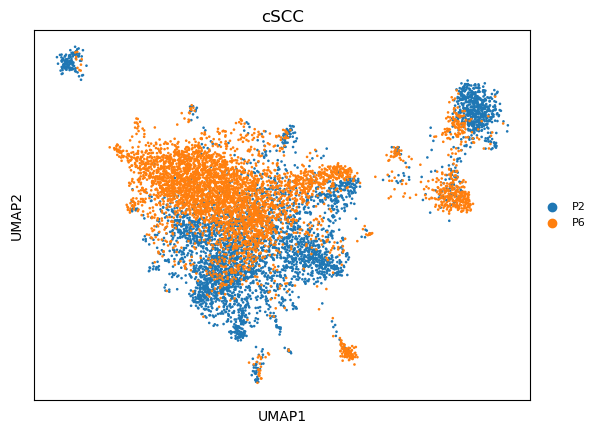

In [6]:
sc.pp.neighbors(adata_p26, use_rep="X")
sc.tl.umap(adata_p26)
sc.pl.umap(adata_p26, legend_fontsize=8,
                color=["patient"], title="cSCC", show=False)


In [7]:
from dataset import Process


In [56]:
adata.obs.groupby('cell.type').count()#/13280

/tmp/ipykernel_757323/1167980001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('cell.type').count()#/13280


,nCount_RNA,nFeature_RNA,patient,tum.norm,level1_celltype,level2_celltype,level3_celltype,n_genes
cell.type,,,,,,,,
B Cell,6,6,6,6,6,6,6,6
Endothelial Cell,258,258,258,258,258,258,258,258
Epithelial,16179,16179,16179,16179,16179,16179,16179,16179
Fibroblast,235,235,235,235,235,235,235,235
Melanocyte,266,266,266,266,266,266,266,266
Myeloid cells,4130,4130,4130,4130,4130,4130,4130,4130
NK,27,27,27,27,27,27,27,27
Tcell,461,461,461,461,461,461,461,461


In [22]:
train_list=[0.003, 0.013, 0.689, 0.011, 0.012, 0.249, 0.001, 0.022]
test_list=[0.003, 0.013, 0.249, 0.011, 0.012, 0.689, 0.001, 0.022]

data_pipeline = Process("cSCC")
data_pipeline.split_train_test(adata_p26, train_list, test_list)


ValueError: 'a' cannot be empty unless no samples are taken

# AD

## E2一

### (1)data preprocess

In [2]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/AD/ad_raw.h5ad")

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
from dataset import Process
data_pipeline = Process("AD")
adata = data_pipeline.preprocess(adata)

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped 

In [4]:
adata_Ct34 = adata[adata.obs['batch']=='Ct3_Ct4']
#Ct1_Ct2 1122; Ct3_Ct4: 3043;  Ct5_Ct6: 2376


In [5]:
adata_Ct34 = adata_Ct34[adata_Ct34.obs['patient']!='Ct-un']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='doublet']

In [6]:
adata_AD12 = adata[adata.obs['batch']=='AD1_AD2']
adata_AD12
#AD1_AD2:3028; AD3_AD4:2605;  AD5_AD6:1040

adata_AD12 = adata_AD12[adata_AD12.obs['patient']!='AD-un']
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='unID'] #unID指的是unidentify
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='doublet']

/usr/local/anaconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/anaconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/anaconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

<AxesSubplot: title={'center': 'AD'}, xlabel='UMAP1', ylabel='UMAP2'>

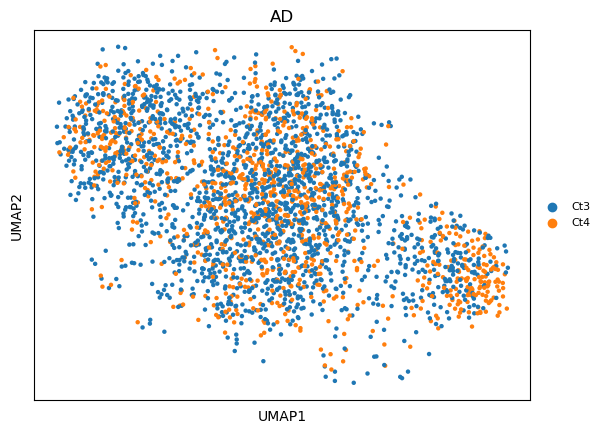

In [7]:
sc.pp.neighbors(adata_Ct34, use_rep="X")
sc.tl.umap(adata_Ct34)
sc.pl.umap(adata_Ct34, legend_fontsize=8,
                color=["patient"], title="AD", show=False)

In [8]:
#还要改名为相同的列名
adata_Ct34.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

In [24]:
#根据这两个样本来确定train和test的细胞比例
# adata_Ct34.obs.groupby('cell.type').count()/2940
# adata_AD12.obs.groupby('cellType').count()/2187


In [9]:
train_list = [0.14, 0.28, 0.01, 0.05, 0.05, 0.47]
test_list = [0.01, 0.04, 0.01, 0.01, 0.05, 0.88]

In [10]:
train_adata, test_adata = data_pipeline.split_train_test(adata_Ct34, train_list, test_list)

/volume1/home/mhuang/cellTypeAbundance/src/test/dataset.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['dataset_type'][train_indices] = 'train'
/volume1/home/mhuang/cellTypeAbundance/src/test/dataset.py:170: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  adata.obs['dataset_type'][train_indices] = 'train'
/volume1/home/mhuang/cellTypeAbundance/src/test/dataset.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

In [32]:
# #ref_adata=1793x3000, test_adata=540x3000
# #由于这个个数，如果选batch size是64/128/256都会让最后只剩一个细胞，没办法跑模型；所以只能随机去除一个细胞类型最多的细胞。
# #ref_adata.obs.groupby('cell.type').count() #发现细胞数最多的细胞是oligo

# oblige_cells = train_adata[ref_adata.obs['cell.type'] == 'oligo'].obs.index.tolist()
# cell_to_remove = 'CCCTCCTAGCGAGAAA-1'#np.random.choice(oblige_cells) #以后都随机移除这个细胞
# train_adata = train_adata[train_adata.obs.index != cell_to_remove]
# train_adata.write("/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_train.h5ad")

### (2)model training

In [1]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
# create dataset
pipeline = propDEC(input_size=3000, num_classes=6, metric="t-sne", mode="soft")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints
Got 566 / 572 with accuracy' 98.95%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 561 / 572 with accuracy' 98.08%
Early Stopping
==> Finish!


In [6]:
import pandas as pd
ground_truth = test_adata.obs.groupby('cell.type').count()/564
ground_truth = ground_truth.iloc[:,0]
ground_truth.name='Ground_truth'
proportion = pd.concat([proportion,ground_truth],axis=1)

/tmp/ipykernel_2222097/2942725635.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ground_truth = test_adata.obs.groupby('cell.type').count()/564


In [38]:
proportion

,ref,predict_1,predict_2,Ground_truth
OPC,0.166282,0.0162,0.0181,0.014184
astro,0.332564,0.0627,0.0669,0.062057
endo,0.011547,0.0098,0.0103,0.014184
mg,0.058891,0.0192,0.0214,0.014184
neuron,0.040416,0.0582,0.0588,0.056738
oligo,0.390300,0.8338,0.8245,0.838652


In [39]:
f1scores

,0,0
f1score_micro,0.991135,0.984043
f1score_macro,0.957119,0.918009


In [40]:
precision

,0,0
OPC,0.888889,0.800000
astro,1.000000,0.972222
endo,1.000000,1.000000
mg,0.800000,0.666667
neuron,0.969697,0.969697
oligo,0.997872,0.997859


In [41]:
recall

,0,0
OPC,1.000000,1.000000
astro,1.000000,1.000000
endo,0.875000,0.750000
mg,1.000000,1.000000
neuron,1.000000,1.000000
oligo,0.991543,0.985201


## E2二

### (1)data preprocess

In [42]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/AD/ad_raw.h5ad")

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [43]:
from dataset import Process
data_pipeline = Process("AD")
adata = data_pipeline.preprocess(adata)

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped 

In [44]:
adata_Ct34 = adata[adata.obs['batch']=='Ct3_Ct4']
#Ct1_Ct2 1122; Ct3_Ct4: 3043;  Ct5_Ct6: 2376

In [45]:
adata_Ct34 = adata_Ct34[adata_Ct34.obs['patient']!='Ct-un']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='doublet']

In [46]:
adata_Ct56 = adata[adata.obs['batch']=='Ct5_Ct6']

#AD1_AD2:3028; AD3_AD4:2605;  AD5_AD6:1040

adata_Ct56 = adata_Ct56[adata_Ct56.obs['patient']!='Ct-un'] #AD-un
adata_Ct56 = adata_Ct56[adata_Ct56.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct56 = adata_Ct56[adata_Ct56.obs['cellType']!='doublet']

In [47]:
import anndata
adata_ct3456 = anndata.concat([adata_Ct34, adata_Ct56],axis=0)

/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'Ct'}, xlabel='UMAP1', ylabel='UMAP2'>

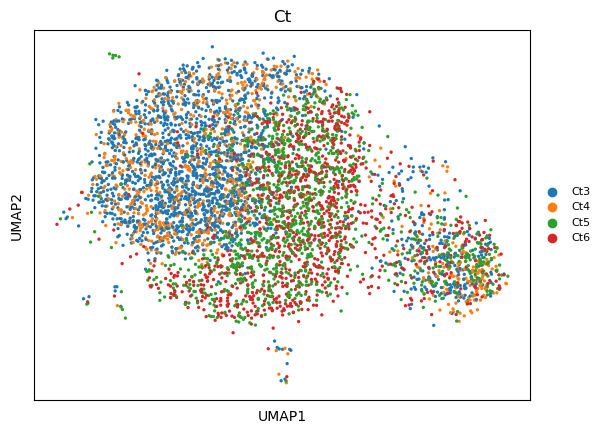

In [27]:
sc.pp.neighbors(adata_ct3456, use_rep="X")
sc.tl.umap(adata_ct3456)
sc.pl.umap(adata_ct3456, legend_fontsize=8,
                color=["patient"], title="Ct", show=False)

In [48]:
adata_ct3456.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

In [49]:
train_list = [0.14, 0.28, 0.01, 0.05, 0.05, 0.47]
test_list = [0.14, 0.28, 0.01, 0.05, 0.05, 0.47]
train_adata, test_adata = data_pipeline.split_train_test(adata_ct3456, train_list, test_list)

/volume1/home/mhuang/cellTypeAbundance/src/test/dataset.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['dataset_type'][train_indices] = 'train'
/volume1/home/mhuang/cellTypeAbundance/src/test/dataset.py:170: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  adata.obs['dataset_type'][train_indices] = 'train'
/volume1/home/mhuang/cellTypeAbundance/src/test/dataset.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

### (2)model training

In [50]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [51]:
# create dataset
pipeline = propDEC(input_size=3000, num_classes=6, metric="t-sne", mode="soft")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [52]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints
Got 1305 / 1307 with accuracy' 99.85%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:111: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Loading Checkpoints


==> Saving Checkpoints
Got 1305 / 1307 with accuracy' 99.85%
Early Stopping
==> Finish!


In [55]:
ground_truth = test_adata.obs.groupby('cell.type').count()/1307
ground_truth = ground_truth.iloc[:,0]
ground_truth.name='Ground_truth'
proportion = pd.concat([proportion,ground_truth],axis=1)

/tmp/ipykernel_865482/3702268972.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ground_truth = test_adata.obs.groupby('cell.type').count()/1307


In [56]:
proportion

,ref,predict_1,predict_2,Ground_truth
OPC,0.166557,0.1656,0.1654,0.165264
astro,0.333113,0.3308,0.3313,0.330528
endo,0.008592,0.0068,0.0068,0.006886
mg,0.041970,0.0402,0.0398,0.039786
neuron,0.059484,0.0575,0.0580,0.058914
oligo,0.390284,0.3991,0.3986,0.398623


In [57]:
f1scores

,0,0
f1score_micro,0.998470,0.998470
f1score_macro,0.998398,0.998398


In [58]:
precision

,0,0
OPC,1.000000,1.000000
astro,0.997691,0.997691
endo,1.000000,1.000000
mg,1.000000,1.000000
neuron,1.000000,1.000000
oligo,0.998081,0.998081


In [59]:
recall

,0,0
OPC,1.000000,1.000000
astro,1.000000,1.000000
endo,1.000000,1.000000
mg,1.000000,1.000000
neuron,0.987013,0.987013
oligo,0.998081,0.998081


## E2三 

### (1)data preprocess

In [14]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/AD/ad_raw.h5ad")

/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [15]:
from dataset import Process
data_pipeline = Process("AD")
adata = data_pipeline.preprocess(adata)

/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [16]:
adata_Ct34 = adata[adata.obs['batch']=='Ct3_Ct4']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['patient']!='Ct-un']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='doublet']

adata_AD12 = adata[adata.obs['batch']=='AD1_AD2']
adata_AD12 = adata_AD12[adata_AD12.obs['patient']!='AD-un']
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='unID'] #unID指的是unidentify
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='doublet']

In [17]:
adata_Ct34.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)
adata_AD12.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

In [9]:
import numpy as np
import anndata as ad
def split_train_test(adata: ad.AnnData, proportions: list):
    cell_type = [types for types in adata.obs["cell.type"].cat.categories]
    total_num = len(adata)
    cell_num_list = [total_num * proportion for proportion in proportions]  # 保存每个细胞类型对应的数量列表
    adata.obs["dataset_type"] = "type"

    for index, value in enumerate(cell_type):
        cell_mask = adata.obs['cell.type'] == value
        cell_indices = np.where(cell_mask)[0]
        num = int(cell_num_list[index])  # 使用单个变量来存储当前细胞类型的数量
        if len(cell_indices) >= num:
            train_indices = np.random.choice(cell_indices, num, replace=False) #无放回抽样
            adata.obs['dataset_type'][train_indices] = 'selected'
        else:
            train_indices = np.random.choice(cell_indices, num, replace=True) #有放回抽样
            adata.obs['dataset_type'][train_indices] = 'selected'

    type1 = adata.obs['dataset_type'] == 'selected'
    selected_adata = adata[type1, :]

    return selected_adata


In [10]:
cell_list = [0.14,0.28,0.01,0.05,0.05, 0.47]
train_adata = split_train_test(adata_Ct34,cell_list)
test_adata = split_train_test(adata_AD12,cell_list)

train_adata.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_train.h5ad')
test_adata.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_test.h5ad')

/tmp/ipykernel_10294/3648349778.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["dataset_type"] = "type"
/tmp/ipykernel_10294/3648349778.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['dataset_type'][train_indices] = 'selected'
/tmp/ipykernel_10294/3648349778.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['dataset_type'][train_indices] = 'selected'
/tmp/ipykernel_10294/3648349778.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["dataset_type"] = "ty

### (2)model training

In [1]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
# create dataset
pipeline = propDEC(input_size=3000, num_classes=6, metric="t-sne", mode="soft")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

In [3]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints
Got 1165 / 1246 with accuracy' 93.50%
==> resample
==> Write the resample annotated data to cache


/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Loading Checkpoints


==> Saving Checkpoints
Got 1117 / 1246 with accuracy' 89.65%
==> resample
==> Write the resample annotated data to cache


/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Loading Checkpoints


==> Saving Checkpoints
Got 1176 / 1246 with accuracy' 94.38%
==> resample
==> Write the resample annotated data to cache


/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Loading Checkpoints


==> Saving Checkpoints
Got 1147 / 1246 with accuracy' 92.05%
==> resample
==> Write the resample annotated data to cache


/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Loading Checkpoints


==> Saving Checkpoints
Got 1179 / 1246 with accuracy' 94.62%
==> resample
==> Write the resample annotated data to cache


/usr/local/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Finish!


In [7]:
ground_truth = test_adata.obs.groupby('cell.type').count()/1246
ground_truth = ground_truth.iloc[:,0]
ground_truth.name='Ground_truth'
proportion = pd.concat([proportion,ground_truth],axis=1)

In [8]:
proportion

,ref,predict_1,predict_2,predict_3,predict_4,predict_5,Ground_truth
OPC,0.178463,0.0194,0.0382,0.0274,0.0384,0.0284,0.025682
astro,0.357360,0.0739,0.1277,0.0795,0.1098,0.0815,0.076244
endo,0.012592,0.0162,0.0239,0.0103,0.0211,0.0096,0.004013
mg,0.038211,0.0121,0.0190,0.0122,0.0183,0.0130,0.016051
neuron,0.035172,0.0524,0.0729,0.0569,0.0676,0.0591,0.053772
oligo,0.378202,0.8260,0.7183,0.8137,0.7448,0.8085,0.824238


In [12]:
f1scores

,0,0,0,0,0
f1score_micro,0.934992,0.896469,0.943820,0.920546,0.946228
f1score_macro,0.754587,0.743996,0.802013,0.768768,0.818883


In [10]:
precision

,0,0,0,0,0
OPC,0.875000,0.688889,0.777778,0.640000,0.800000
astro,0.966292,0.612903,0.916667,0.736434,0.891089
endo,0.294118,0.200000,0.357143,0.200000,0.416667
mg,0.923077,0.941176,1.000000,0.944444,0.933333
neuron,0.725806,0.655914,0.753425,0.717647,0.760000
oligo,0.956772,0.997805,0.973373,0.997870,0.977183


In [11]:
recall

,0,0,0,0,0
OPC,0.656250,0.968750,0.875000,1.000000,0.875000
astro,0.905263,1.000000,0.926316,1.000000,0.947368
endo,1.000000,1.000000,1.000000,1.000000,1.000000
mg,0.600000,0.800000,0.650000,0.850000,0.700000
neuron,0.671642,0.910448,0.820896,0.910448,0.850746
oligo,0.969815,0.885102,0.961052,0.912366,0.959104


## E2四

### (1)data preprocessing

In [2]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/AD/ad_raw.h5ad")

from dataset import Process
data_pipeline = Process("AD")
adata = data_pipeline.preprocess(adata)

adata_Ct34 = adata[adata.obs['batch']=='Ct3_Ct4']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['patient']!='Ct-un']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='doublet']

adata_AD12 = adata[adata.obs['batch']=='AD1_AD2']
adata_AD12 = adata_AD12[adata_AD12.obs['patient']!='AD-un']
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='unID'] #unID指的是unidentify
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='doublet']

adata_Ct34.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)
adata_AD12.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them uniqu

In [3]:
adata_Ct34.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_train.h5ad')
adata_AD12.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_test.h5ad')

### (2)model training

In [4]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [5]:
# create dataset
pipeline = propDEC(input_size=3000, num_classes=6, metric="t-sne", mode="km")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [6]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints


100%|██████████| 2/2 [00:00<00:00, 366.67it/s]
/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> KM algortithm over!
Got 2089 / 2187 with accuracy' 95.52%
==> resample
==> Write the resample annotated data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints


100%|██████████| 6/6 [00:01<00:00,  4.76it/s]
/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> KM algortithm over!
Got 2007 / 2187 with accuracy' 91.77%
==> resample
==> Write the resample annotated data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints


100%|██████████| 3/3 [00:00<00:00, 345.30it/s]
/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> KM algortithm over!
Got 2085 / 2187 with accuracy' 95.34%
==> resample
==> Write the resample annotated data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints


100%|██████████| 4/4 [00:00<00:00, 178.05it/s]

==> KM algortithm over!
Got 2062 / 2187 with accuracy' 94.28%
Early Stopping
==> Finish!


In [7]:
test_adata

AnnData object with n_obs × n_vars = 2187 × 3000
    obs: 'sampleID', 'batch', 'patient', 'sex', 'nGene', 'nUMI', 'pctMT', 'cell.type', 'batchCond', 'subclustCond', 'subIDm', 'subIDa', 'subIDn', 'subIDo', 'subIDO', 'subIDe', 'subIDu', 'subIDh', 'mg', 'astro', 'neuron', 'oligo', 'OPC', 'endo', 'UMAP1_ALL', 'UMAP2_ALL', 'PC1_ALL', 'PC2_ALL', 'PC3_ALL', 'subclustID', 'UMAP1_ct', 'UMAP2_ct', 'PC1_ct', 'PC2_ct', 'PC3_ct', 'sample_id', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'
    obsm: 'emb'

In [8]:
ground_truth = test_adata.obs.groupby('cell.type').count()/2187
ground_truth = ground_truth.iloc[:,0]
ground_truth.name='Ground_truth'
proportion = pd.concat([proportion,ground_truth],axis=1)

/tmp/ipykernel_564498/1509495449.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ground_truth = test_adata.obs.groupby('cell.type').count()/2187


In [9]:
proportion

,ref,predict_1,predict_2,predict_3,predict_4,Ground_truth
OPC,0.144558,0.0155,0.0271,0.0210,0.0256,0.014632
astro,0.286735,0.0439,0.0836,0.0498,0.0636,0.043439
endo,0.010884,0.0064,0.0092,0.0046,0.0055,0.002286
mg,0.047279,0.0064,0.0110,0.0073,0.0096,0.009145
neuron,0.041837,0.0416,0.0574,0.0530,0.0545,0.044353
oligo,0.468707,0.8861,0.8116,0.8642,0.8411,0.886145


In [10]:
f1scores

,0,0,0,0
f1score_micro,0.955190,0.917695,0.953361,0.942844
f1score_macro,0.760586,0.733050,0.796578,0.799376


In [11]:
precision

,0,0,0,0
OPC,0.687500,0.525424,0.600000,0.561404
astro,0.936170,0.489691,0.785714,0.630137
endo,0.357143,0.277778,0.555556,0.500000
mg,0.857143,0.850000,0.857143,0.888889
neuron,0.752688,0.724409,0.771930,0.762712
oligo,0.975258,0.998869,0.985209,0.994015


In [12]:
recall

,0,0,0,0
OPC,0.687500,0.968750,0.843750,1.000000
astro,0.926316,1.000000,0.926316,0.968421
endo,1.000000,1.000000,1.000000,1.000000
mg,0.600000,0.850000,0.600000,0.800000
neuron,0.721649,0.948454,0.907216,0.927835
oligo,0.976264,0.911765,0.962332,0.942724
